### Import dependencies

In [1]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect,Column, Integer, String, Float
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import pandas as pd
import os
import math

# Imports the methods needed to abstract python classes into database tables
from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()

#from config import db_user, dialect

### Create database connection

In [4]:
# variables to populate the database connection string
db_user = 'postgres'
db_password = 'berly93!'
db_host = 'localhost'
db_port = 5432

# This database must already exist
db_name = "Employees_DB"

engine = create_engine(f"postgres://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}")

### Create a "Metadata" layer that abstracts our SQL database

In [5]:
Base.metadata.create_all(engine)

### Create a *Session* object to connect to DB

Creating a session opens up a communication pathway between our code and the database.

In [6]:
session = Session(bind=engine)

In [8]:
emp_sal_title_df = pd.read_sql("select e.emp_no, e.last_name, e.first_name, t.title , s.salary from employees as e join salaries as s on e.emp_no = s.emp_no join titles as t on t.title_id = e.emp_title_id", engine)

emp_sal_title_df.head()

,emp_no,last_name,first_name,title,salary
0,10005,Maliniak,Kyoichi,Staff,78228
1,10010,Piveteau,Duangkaew,Engineer,72488
2,10011,Sluis,Mary,Staff,42365
3,10013,Terkki,Eberhardt,Senior Staff,40000
4,10017,Bouloucos,Cristinel,Staff,71380


In [46]:
#creating DF
sal_title_df = pd.DataFrame(columns = ["Title","Average Salary"])
#Grouping by title
sal_title_gb = emp_sal_title_df.groupby(['title'])
avg_sal = sal_title_gb['salary'].mean()
sal_title_df['Average Salary'] =  avg_sal
#sal_title_df['Average Salary'] = sal_title_df['Average Salary'].apply(lambda x: "${:.2f}".format((x/1)))
sal_title_df['Title']=sal_title_df.index
sal_title_df.reset_index(inplace=True, drop=True)
#display
sal_title_df.head(10)

,Title,Average Salary
0,Assistant Engineer,48564.434447
1,Engineer,48535.336511
2,Manager,51531.041667
3,Senior Engineer,48506.799871
4,Senior Staff,58550.172704
5,Staff,58465.382850
6,Technique Leader,48582.896092


Text(0.5, 1.0, 'Average Salary per Title')

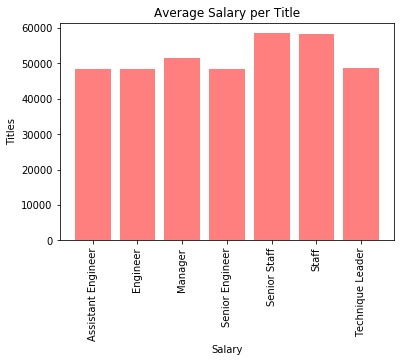

In [47]:
#plt.figure(figsize=(15,6))
x_axis = np.arange(len(sal_title_df['Average Salary']))
y_axis = sal_title_df['Average Salary']

plt.bar(x_axis,y_axis, color='r', alpha=0.5, align="center")
plt.xticks(x_axis, sal_title_df['Title'],rotation='vertical')

plt.ylabel('Titles')
plt.xlabel('Salary')


plt.title("Average Salary per Title")

Text(0.5, 1.0, 'Histogram of Salary')

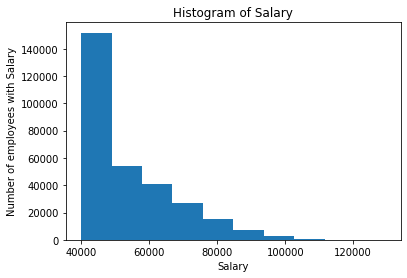

In [49]:
plt.hist(emp_sal_title_df['salary'], histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, label=None, stacked=False, data=None)

plt.ylabel('Number of employees with Salary')
plt.xlabel('Salary')
plt.title("Histogram of Salary")

### Once you're finished communicating with the database, it's good practice to close the communication pathway

In [50]:
session.close()